In [2]:
#12 June 15, 2018       S&P 500: -0.10%


In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator 

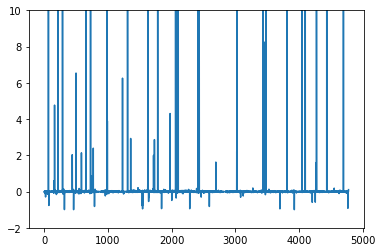

In [4]:
data = pd.read_csv("12.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 06/14/2018'].values
price2=data['Price 06/15/2018'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,10)
plt.show()

67 25.349999999999994
219 29.344827586206904
288 19.833333333333332
656 14.166666666666666
728 22.333333333333336
989 21.35714285714286
1309 35.19047619047619
1627 138.57142857142856
1782 23.365853658536587
2063 23.12
2091 27473.999999999996
2104 45.075949367088604
2416 11.407079646017701
2434 10.049250535331906
3026 329.4347826086957
3435 3225.6666666666665
3483 2095.0
3815 139.76923076923075
4048 180.48148148148147
4098 110.37037037037037
4275 695.4285714285714
4436 21.181818181818183
4698 2049.0


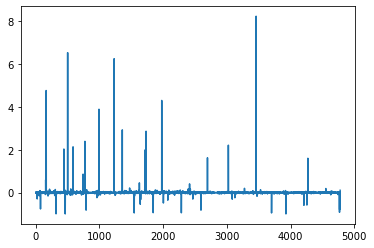

In [5]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
#plt.ylim(-2,10)
plt.show()

In [6]:
cluster_distance=[]
clusters=[]
for k in range(10,50): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1  #how many stocks in each cluster 
            count[int(price3index[i][0])][1]+=pricechange[i]   #sum of distance in each cluster
            center=count[:,1]/(count[:,0]+1e-9)  #new centers

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print('Cluster Number:',k,'Total Distance:',total)
    cluster_distance.append(total)
    clusters.append(k)

Cluster Number: 10 Total Distance: 44.38812932965025
Cluster Number: 11 Total Distance: 41.41420839203732
Cluster Number: 12 Total Distance: 37.892699555449944
Cluster Number: 13 Total Distance: 35.27324525254685
Cluster Number: 14 Total Distance: 33.12344545200285
Cluster Number: 15 Total Distance: 30.62298328274695
Cluster Number: 16 Total Distance: 30.100441071333265
Cluster Number: 17 Total Distance: 27.669309749508102
Cluster Number: 18 Total Distance: 26.55686408509646
Cluster Number: 19 Total Distance: 25.854448160630593
Cluster Number: 20 Total Distance: 24.44126749174683
Cluster Number: 21 Total Distance: 23.730809801769766
Cluster Number: 22 Total Distance: 22.844083438815872
Cluster Number: 23 Total Distance: 22.27065994199239
Cluster Number: 24 Total Distance: 22.27087586162412
Cluster Number: 25 Total Distance: 21.315279156289648
Cluster Number: 26 Total Distance: 20.924524105145018
Cluster Number: 27 Total Distance: 20.310414951217165
Cluster Number: 28 Total Distance: 20

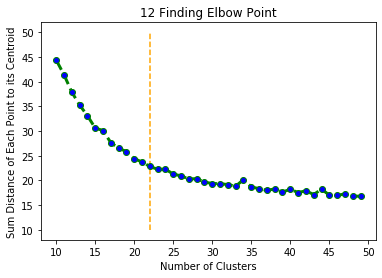

In [11]:
fig=plt.figure()

x=clusters
y=cluster_distance

kn=KneeLocator(x, y, curve='convex', direction='decreasing')


plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=6)

plt.vlines(kn.knee,10, 50,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('12 Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [12]:
kn.knee

22

In [13]:
fig.savefig('12 June15 2018.png')